In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraudulent-transactions-data/Fraud.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("/kaggle/input/fraudulent-transactions-data/Fraud.csv")

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
#checking for null values
df.isnull().values.any()

False

In [6]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
print(df['isFraud'].value_counts())

0    6354407
1       8213
Name: isFraud, dtype: int64


<Axes: xlabel='isFraud', ylabel='count'>

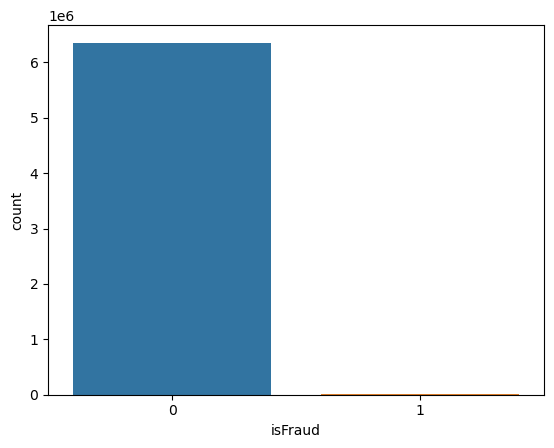

In [8]:
sns.countplot(x = df['isFraud'])

<Axes: xlabel='type', ylabel='count'>

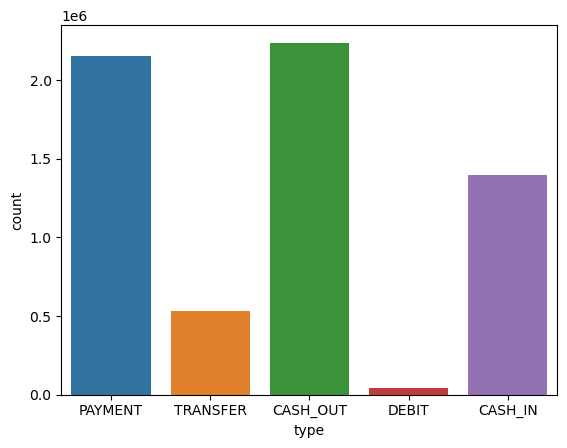

In [9]:
sns.countplot(x = df['type'])

From above graph we can see maximum weitage of transaction type is Payment,Cash_out followed by Cash_in

<Axes: xlabel='step', ylabel='Density'>

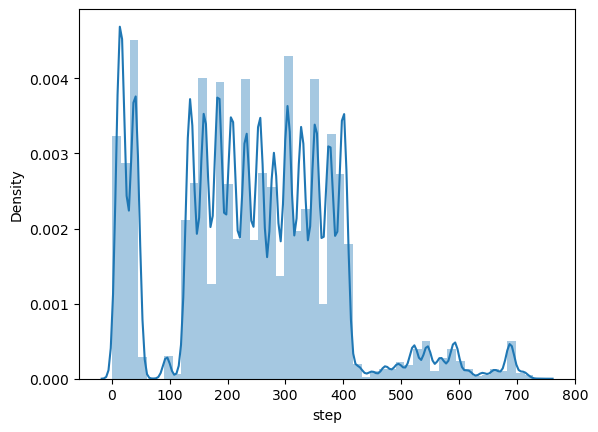

In [10]:
sns.distplot(df['step'])

<Axes: >

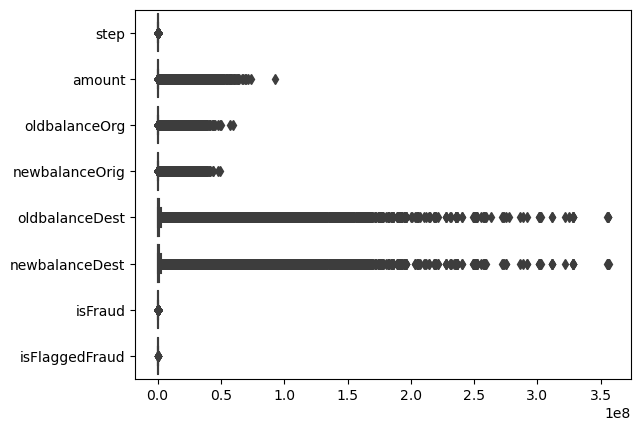

In [11]:
 sns.boxplot(data=df[df.columns], orient='h')

In [12]:
q1 = df['amount'].quantile(.25)
q3 = df['amount'].quantile(.75)
IQR = q3 - q1
df['amount'] = np.clip(df['amount'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)
 
q1 = df['oldbalanceDest'].quantile(.25)
q3 = df['oldbalanceDest'].quantile(.75)
IQR = q3 - q1
df['oldbalanceDest'] = np.clip(df['oldbalanceDest'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)
  
q1 = df['newbalanceDest'].quantile(.25)
q3 = df['newbalanceDest'].quantile(.75)
IQR = q3 - q1
df['newbalanceDest'] = np.clip(df['newbalanceDest'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)
q1 = df['oldbalanceOrg'].quantile(.25)
q3 = df['oldbalanceOrg'].quantile(.75)
IQR = q3 - q1
df['oldbalanceOrg'] = np.clip(df['oldbalanceOrg'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)
q1 = df['newbalanceOrig'].quantile(.25)
q3 = df['newbalanceOrig'].quantile(.75)
IQR = q3 - q1
df['newbalanceOrig'] = np.clip(df['newbalanceOrig'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)

<Axes: >

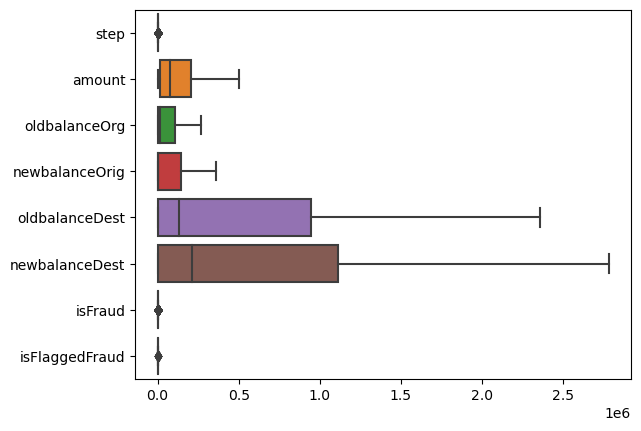

In [13]:
 sns.boxplot(data=df[df.columns], orient='h')

In [14]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['nameOrig']= label_encoder.fit_transform(df['nameOrig'])
df['nameDest']= label_encoder.fit_transform(df['nameDest'])

In [15]:

one_hot_encoded_data = pd.get_dummies(df, columns = ['type'])
one_hot_encoded_data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0,0,0,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 534.0+ MB


In [17]:
# Remove column name 'A'
df_new=df.drop(['type'], axis=1)

In [18]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_new.values, i)
                          for i in range(len(df_new.columns))]
  
print(vif_data)

          feature        VIF
0            step   2.969570
1          amount   2.851995
2        nameOrig   3.015091
3   oldbalanceOrg   6.100462
4  newbalanceOrig   6.608858
5        nameDest   2.037508
6  oldbalanceDest  33.125865
7  newbalanceDest  36.905520
8         isFraud   1.025373
9  isFlaggedFraud   1.001996


VIF of oldbalanceDest and newbalanceDest is high.

<Axes: >

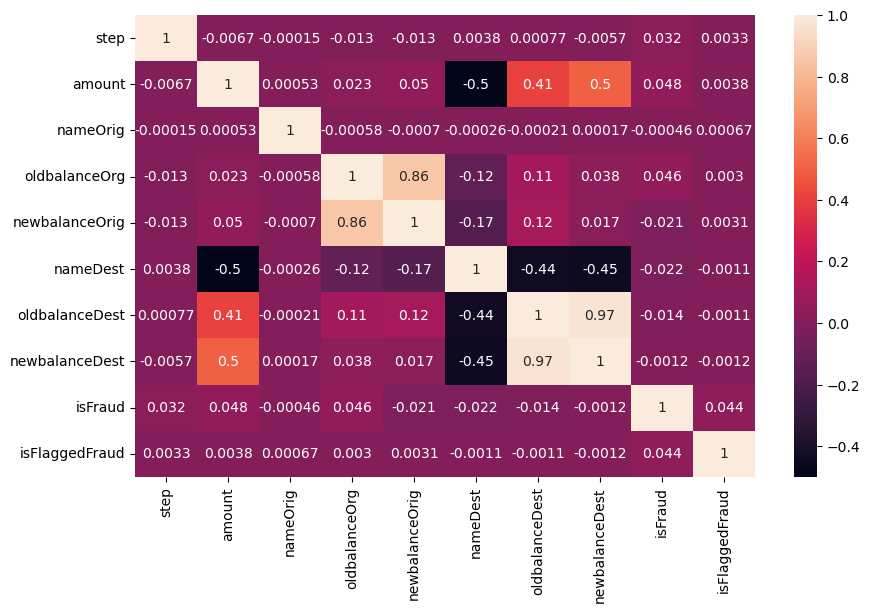

In [19]:


corr=df_new.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [20]:
df_new['diff_balanceorig']=df_new['oldbalanceOrg']-df_new['newbalanceOrig']
df_new['diff_balancedest']=df_new['oldbalanceDest']-df_new['newbalanceDest']


In [23]:
df_new.head(1)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diff_balanceorig,diff_balancedest
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,9839.64,0.0


In [24]:
df_final= df_new.drop(["oldbalanceOrg",'newbalanceOrig','oldbalanceDest','newbalanceDest'], axis= 1)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df_final.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]
  
print(vif_data)

            feature       VIF
0              step  2.846056
1            amount  2.670965
2          nameOrig  2.884366
3          nameDest  1.968066
4           isFraud  1.019582
5    isFlaggedFraud  1.001992
6  diff_balanceorig  1.311235
7  diff_balancedest  1.961839


By adding and dropping features vif has improved

In [26]:
df_final

,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,diff_balanceorig,diff_balancedest
0,1,9839.64000,757869,1662094,0,0,9839.6400,0.000000e+00
1,1,1864.28000,2188998,1733924,0,0,1864.2800,0.000000e+00
2,1,181.00000,1002156,439685,1,0,181.0000,0.000000e+00
3,1,181.00000,5828262,391696,1,0,181.0000,2.118200e+04
4,1,11668.14000,3445981,828919,0,0,11668.1400,0.000000e+00
...,...,...,...,...,...,...,...,...
6362615,743,339682.13000,5651847,505863,1,0,268287.9375,-3.396821e+05
6362616,743,501719.33875,1737278,260949,1,0,268287.9375,0.000000e+00
6362617,743,501719.33875,533958,108224,1,0,268287.9375,-2.711284e+06
6362618,743,501719.33875,2252932,319713,1,0,268287.9375,0.000000e+00


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [28]:
# Perform Scaling
scaler = StandardScaler()
df_final["NormalizedAmount"] = scaler.fit_transform(df_final["amount"].values.reshape(-1, 1))
df_final.drop(["amount"], inplace= True, axis= 1)

Y = df_final["isFraud"]
X = df_final.drop(["isFraud"], axis= 1)

In [29]:
Y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [30]:
X

,step,nameOrig,nameDest,isFlaggedFraud,diff_balanceorig,diff_balancedest,NormalizedAmount
0,1,757869,1662094,0,9839.6400,0.000000e+00,-0.837184
1,1,2188998,1733924,0,1864.2800,0.000000e+00,-0.891721
2,1,1002156,439685,0,181.0000,0.000000e+00,-0.903232
3,1,5828262,391696,0,181.0000,2.118200e+04,-0.903232
4,1,3445981,828919,0,11668.1400,0.000000e+00,-0.824680
...,...,...,...,...,...,...,...
6362615,743,5651847,505863,0,268287.9375,-3.396821e+05,1.418354
6362616,743,1737278,260949,0,268287.9375,0.000000e+00,2.526400
6362617,743,533958,108224,0,268287.9375,-2.711284e+06,2.526400
6362618,743,2252932,319713,0,268287.9375,0.000000e+00,2.526400


In [31]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 7)
Shape of X_test:  (1908786, 7)


Used Xgboost for train the model
Beacuse:
xgboost is not influenced by outliers and ensembling techniquis work well with imbalanced data.

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier().fit(X_train, Y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, Y_test)



In [33]:
xgb_score

0.9995379262002131

The  accuracy is very high for imbalanced data.

We  will try for balance data.

In [34]:
from imblearn.under_sampling import RandomUnderSampler  
                                                        #Doing Under sampling to make data balance
under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X,Y)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [36]:
import xgboost as xgb
xgb_model  = xgb.XGBClassifier()

In [37]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[1,2,3,4] }
clf = GridSearchCV(xgb.XGBClassifier(), parameters, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1, param_grid={'max_depth': [1, 2, 3, 4]},
             return_train_score=True, scoring='roc_auc')

In [38]:
y_predict = clf.predict(x_test)
y_predict_train = clf.predict(x_train)
# accuracy score
score = accuracy_score(y_predict, y_test)


In [39]:
score_train = accuracy_score(y_predict_train, y_train)

In [40]:
score

0.9765672550213025

In [41]:
score_train

0.9851598173515982

Train and Test accuracy does not have much difference soit is not underfitting or overfitting.

In [42]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - xg_boost")
tn, fp, fn, tp = confusion_matrix(y_test,y_predict ).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')



TP,FP,TN,FN - xg_boost
True Positives: 1614
False Positives: 54
True Negatives: 1595
False Negatives: 23


In [43]:
classification_report = classification_report(y_test,y_predict)
print("Classification Report - xg-boost")
print(classification_report)

Classification Report - xg-boost
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1649
           1       0.97      0.99      0.98      1637

    accuracy                           0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286



In [44]:
pred_prob1 = clf.predict_proba(x_test)


In [45]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [46]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])


print(auc_score1)

0.9974027686760046


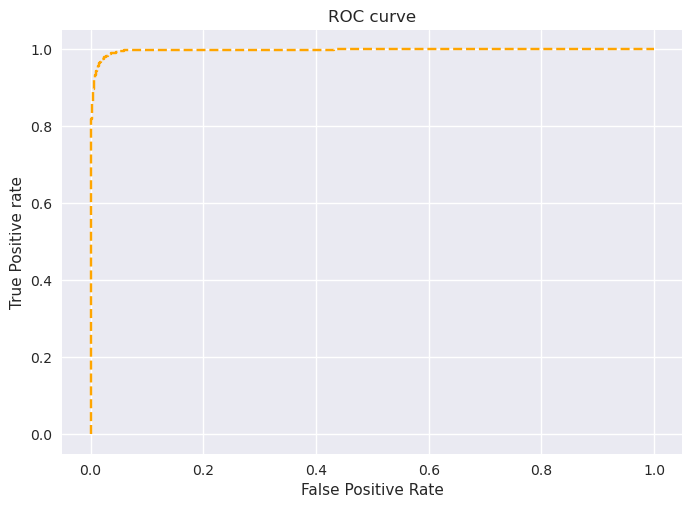

In [47]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Conclusions
The model has high precision,F1 score so  good to use.
When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative ones. So this model has auc score 0.99 so its performing well.